In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import sys

from matplotlib.ticker import FormatStrFormatter

sys.path.append("../NYC-Taxi")
plt.rcParams.update({'figure.max_open_warning': 0})   
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Visualisation

In [2]:
#Import .csv
df = pd.read_csv("../data/02_intermediate/train.csv")
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_dayofweek,pickup_part4h,distance_km,km_per_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,-73.982155,40.767937,-73.964630,40.765602,455,0,4,1.498523,12
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,-73.980415,40.738564,-73.999481,40.731152,663,6,0,1.805510,10
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,-73.979027,40.763939,-74.005333,40.710087,2124,1,2,6.385108,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,-74.010040,40.719971,-74.012268,40.706718,429,2,4,1.485501,12
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,-73.973053,40.793209,-73.972923,40.782520,435,5,3,1.188590,10


## Vitesse moyenne de chaque trajet

In [3]:
sns.histplot(df['distance_km']);
fig = plt.gcf()
# Modifie la taille du graphique
fig.set_size_inches(20,6)

KeyError: 'distancepertime'

## Pourcentage de trajets effectués en fonction du jour de la semaine (moyenne)

In [140]:
df['pickup_dayofweek'].replace({
    0:"Lundi",
    1:"Mardi",
    2:"Mercredi",
    3:"Jeudi",
    4:"Vendredi",
    5:"Samedi",
    6:"Dimanche"
}, inplace=True)

<AxesSubplot:>

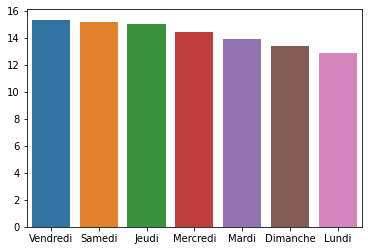

In [141]:
count_day = df["pickup_dayofweek"].value_counts()
sns.barplot(x=count_day.index, y=count_day.values/len(df)*100)

## Pourcentage de trajets effectués en fonction de l’horaire de la journée par tranche de 4h.

In [142]:
df['pickup_part4h'].replace({
    0:"0h-4h",
    1:"4h-8h",
    2:"8h-12h",
    3:"12h-16h",
    4:"16h-20h",
    5:"20h-0h"
}, inplace=True)

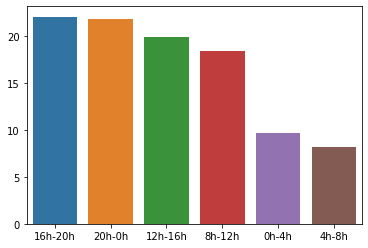

In [143]:
count_hour = df['pickup_part4h'].value_counts()
sns.barplot(x=count_hour.index, y=count_hour.values/len(df)*100);

## Nombre de km parcourus par jour de la semaine

<AxesSubplot:xlabel='pickup_dayofweek'>

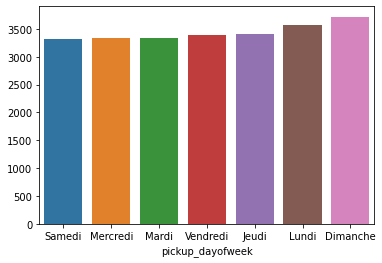

In [144]:
km_per_day = df["distance"].groupby(df["pickup_dayofweek"]).mean().sort_values()
sns.barplot(x=km_per_day.index, y=km_per_day.values)